# DECOY FashionMNIST CNN Switch XIL on after n epochs experiments

### EXCEUTE ONLY FOR GOOGLE COLAB  !

In [1]:
# SETUP STUFF
# this mounts your Google Drive to the Colab VM.
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# enter the foldername in your Drive where you have saved the xil program 
FOLDERNAME = "Masterthesis/XIL_experiments/xil_framework"
assert FOLDERNAME is not None, "[!] Enter the foldername."

# now that we've mounted your Drive, this ensures that
# the Python interpreter of the Colab VM can load
# python files from within it.
import sys
sys.path.append('/content/drive/MyDrive/{}'.format(FOLDERNAME))

Mounted at /content/drive


In [ ]:
pip install captum

In [ ]:
pip install lime

In [4]:
cd /content/drive/MyDrive/Masterthesis/XIL_experiments/xil_framework/

/content/drive/MyDrive/Masterthesis/XIL_experiments/xil_framework


### Setup notebook


In [5]:
import logging

import torch
from torch import nn
from torch.nn import functional as F
import numpy as np

from learner.models import dnns
from learner.learner import Learner
from data_store.datasets import decoy_mnist, decoy_mnist_CE_augmented
from xil_methods.xil_loss import RRRLoss, RRRGradCamLoss, CDEPLoss, HINTLoss, RBRLoss
import util
import explainer

# Hyperparameters
EPOCHS = 100
BATCH_SIZE = 256
LR = 0.001
SAVE_LAST = True
VERBOSE_AFTER_N_EPOCHS = 2
DISABLE_FIRST_EPOCHS = 50
SEED = 10

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
print(f"[Using {DEVICE} device]")

# matplot magic
%matplotlib inline
# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

[Using cuda device]


In [6]:
util.empty_log_run_model_store_folders()

### RRR: Switch on after 50 epochs 

[Using Seed= 10]
Loading dataset from existing file!
RRR -> Switch XIL on after 50 epochs:
Start training...
Epoch 2| accuracy: 91.7%, loss: 0.000941 | Test Error: Acc: 70.4%, Avg loss: 0.007055
Epoch 4| accuracy: 95.2%, loss: 0.000542 | Test Error: Acc: 64.3%, Avg loss: 0.007269
Epoch 6| accuracy: 96.6%, loss: 0.000378 | Test Error: Acc: 61.3%, Avg loss: 0.007370
Epoch 8| accuracy: 97.3%, loss: 0.000299 | Test Error: Acc: 62.4%, Avg loss: 0.007337
Epoch 10| accuracy: 97.8%, loss: 0.000243 | Test Error: Acc: 59.1%, Avg loss: 0.007449
Epoch 12| accuracy: 98.1%, loss: 0.000210 | Test Error: Acc: 58.8%, Avg loss: 0.007461
Epoch 14| accuracy: 98.2%, loss: 0.000192 | Test Error: Acc: 59.2%, Avg loss: 0.007446
Epoch 16| accuracy: 98.4%, loss: 0.000182 | Test Error: Acc: 58.5%, Avg loss: 0.007482
Epoch 18| accuracy: 98.3%, loss: 0.000189 | Test Error: Acc: 58.8%, Avg loss: 0.007471
Epoch 20| accuracy: 98.6%, loss: 0.000160 | Test Error: Acc: 60.6%, Avg loss: 0.007393
Epoch 22| accuracy: 98.8%

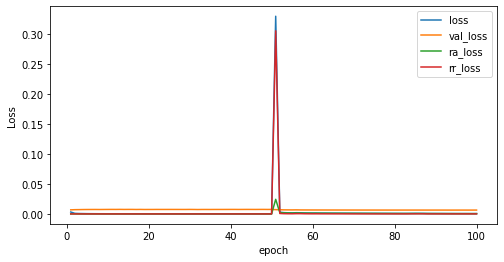

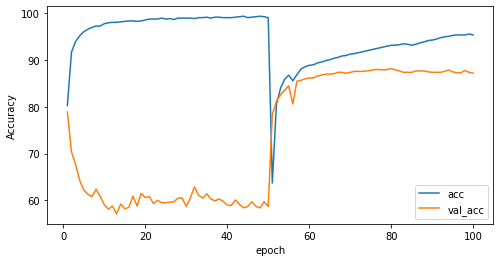

In [7]:
############# Initalize dataset and dataloader
util.seed_all(SEED)
train_dataloader, test_dataloader = decoy_mnist(fmnist=True, device=DEVICE, batch_size=BATCH_SIZE)

#######################################################################
print("RRR -> Switch XIL on after 50 epochs:")

########### initalize model, loss and optimizer
model = dnns.SimpleConvNet().to(DEVICE)
loss_fn = RRRLoss(10)
optimizer = torch.optim.Adam(model.parameters(), lr=LR)

############ Learn routine
learner = Learner(model, loss_fn, optimizer, DEVICE, 'SwitchOnAfter50-DecoyFMnist-CNN-RRR--reg=10--seed=10')
learner.fit(train_dataloader, test_dataloader, EPOCHS, save_last=SAVE_LAST, verbose_after_n_epochs=VERBOSE_AFTER_N_EPOCHS, disable_xil_loss_first_n_epochs=DISABLE_FIRST_EPOCHS)

learner.plot_loss_acc()


### RRRGradCam: Switch XIL on after 50 epochs

[Using Seed= 10]
Loading dataset from existing file!
RRRGradCam -> Switch XIL on after 50 epochs:
Start training...
Epoch 2| accuracy: 91.7%, loss: 0.000941 | Test Error: Acc: 70.4%, Avg loss: 0.007055
Epoch 4| accuracy: 95.2%, loss: 0.000542 | Test Error: Acc: 64.3%, Avg loss: 0.007269
Epoch 6| accuracy: 96.6%, loss: 0.000378 | Test Error: Acc: 61.3%, Avg loss: 0.007370
Epoch 8| accuracy: 97.3%, loss: 0.000299 | Test Error: Acc: 62.4%, Avg loss: 0.007337
Epoch 10| accuracy: 97.8%, loss: 0.000243 | Test Error: Acc: 59.1%, Avg loss: 0.007449
Epoch 12| accuracy: 98.1%, loss: 0.000210 | Test Error: Acc: 58.8%, Avg loss: 0.007461
Epoch 14| accuracy: 98.2%, loss: 0.000192 | Test Error: Acc: 59.2%, Avg loss: 0.007446
Epoch 16| accuracy: 98.4%, loss: 0.000182 | Test Error: Acc: 58.5%, Avg loss: 0.007482
Epoch 18| accuracy: 98.3%, loss: 0.000189 | Test Error: Acc: 58.8%, Avg loss: 0.007471
Epoch 20| accuracy: 98.6%, loss: 0.000160 | Test Error: Acc: 60.6%, Avg loss: 0.007393
Epoch 22| accuracy

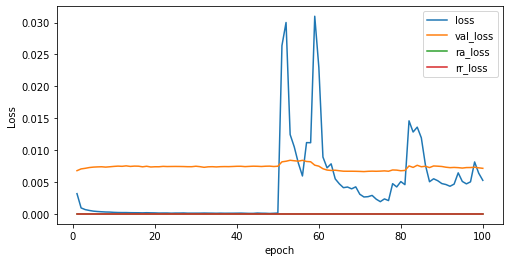

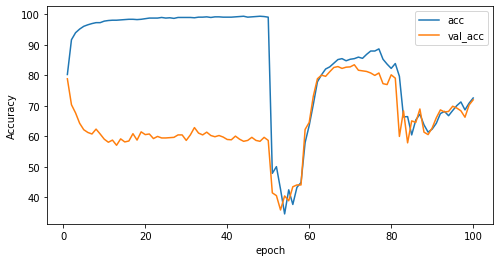

In [9]:
############# Initalize dataset and dataloader
util.seed_all(SEED)
train_dataloader, test_dataloader = decoy_mnist(fmnist=True, device=DEVICE, batch_size=BATCH_SIZE)

#######################################################################
print("RRRGradCam -> Switch XIL on after 50 epochs:")

########### initalize model, loss and optimizer
model = dnns.SimpleConvNet().to(DEVICE)
loss_fn = RRRGradCamLoss(1)
optimizer = torch.optim.Adam(model.parameters(), lr=LR)

############ Learn routine
learner = Learner(model, loss_fn, optimizer, DEVICE, 'SwitchOnAfter50-DecoyFMnist-CNN-RRRGradCam--reg=1--seed=10')
learner.fit(train_dataloader, test_dataloader, EPOCHS, save_last=SAVE_LAST, verbose_after_n_epochs=VERBOSE_AFTER_N_EPOCHS, disable_xil_loss_first_n_epochs=DISABLE_FIRST_EPOCHS)

learner.plot_loss_acc()


### RBR: Switch XIL on after 50 epochs

[Using Seed= 10]
Loading dataset from existing file!
RBR -> Switch XIL on after 50 epochs:
Start training...
Epoch 2| accuracy: 91.7%, loss: 0.000941 | Test Error: Acc: 70.4%, Avg loss: 0.007055
Epoch 4| accuracy: 95.2%, loss: 0.000542 | Test Error: Acc: 64.3%, Avg loss: 0.007269
Epoch 6| accuracy: 96.6%, loss: 0.000378 | Test Error: Acc: 61.3%, Avg loss: 0.007370
Epoch 8| accuracy: 97.3%, loss: 0.000299 | Test Error: Acc: 62.4%, Avg loss: 0.007337
Epoch 10| accuracy: 97.8%, loss: 0.000243 | Test Error: Acc: 59.1%, Avg loss: 0.007449
Epoch 12| accuracy: 98.1%, loss: 0.000210 | Test Error: Acc: 58.8%, Avg loss: 0.007461
Epoch 14| accuracy: 98.2%, loss: 0.000192 | Test Error: Acc: 59.2%, Avg loss: 0.007446
Epoch 16| accuracy: 98.4%, loss: 0.000182 | Test Error: Acc: 58.5%, Avg loss: 0.007482
Epoch 18| accuracy: 98.3%, loss: 0.000189 | Test Error: Acc: 58.8%, Avg loss: 0.007471
Epoch 20| accuracy: 98.6%, loss: 0.000160 | Test Error: Acc: 60.6%, Avg loss: 0.007393
Epoch 22| accuracy: 98.8%

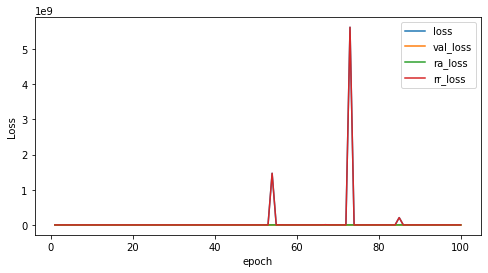

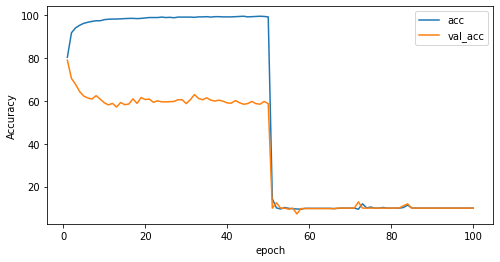

In [11]:
############# Initalize dataset and dataloader
util.seed_all(SEED)
train_dataloader, test_dataloader = decoy_mnist(fmnist=True, device=DEVICE, batch_size=BATCH_SIZE)

#######################################################################
print("RBR -> Switch XIL on after 50 epochs:")

########### initalize model, loss and optimizer
model = dnns.SimpleConvNet().to(DEVICE)
loss_fn = RBRLoss(1000)
optimizer = torch.optim.Adam(model.parameters(), lr=LR)

############ Learn routine
learner = Learner(model, loss_fn, optimizer, DEVICE, 'SwitchOnAfter50-DecoyFMnist-CNN-RBR--reg=1M--seed=10')
learner.fit(train_dataloader, test_dataloader, EPOCHS, save_last=SAVE_LAST, verbose_after_n_epochs=VERBOSE_AFTER_N_EPOCHS, disable_xil_loss_first_n_epochs=DISABLE_FIRST_EPOCHS)

learner.plot_loss_acc()


### CDEP: Switch XIL on after 50 epochs

[Using Seed= 10]
Loading dataset from existing file!
CDEP -> Switch XIL on after 50 epochs:
Start training...
Epoch 2| accuracy: 91.7%, loss: 0.000941 | Test Error: Acc: 70.4%, Avg loss: 0.007055
Epoch 4| accuracy: 95.2%, loss: 0.000542 | Test Error: Acc: 64.3%, Avg loss: 0.007269
Epoch 6| accuracy: 96.6%, loss: 0.000378 | Test Error: Acc: 61.3%, Avg loss: 0.007370
Epoch 8| accuracy: 97.3%, loss: 0.000299 | Test Error: Acc: 62.4%, Avg loss: 0.007337
Epoch 10| accuracy: 97.8%, loss: 0.000243 | Test Error: Acc: 59.1%, Avg loss: 0.007449
Epoch 12| accuracy: 98.1%, loss: 0.000210 | Test Error: Acc: 58.8%, Avg loss: 0.007461
Epoch 14| accuracy: 98.2%, loss: 0.000192 | Test Error: Acc: 59.2%, Avg loss: 0.007446
Epoch 16| accuracy: 98.4%, loss: 0.000182 | Test Error: Acc: 58.5%, Avg loss: 0.007482
Epoch 18| accuracy: 98.3%, loss: 0.000189 | Test Error: Acc: 58.8%, Avg loss: 0.007471
Epoch 20| accuracy: 98.6%, loss: 0.000160 | Test Error: Acc: 60.6%, Avg loss: 0.007393
Epoch 22| accuracy: 98.8

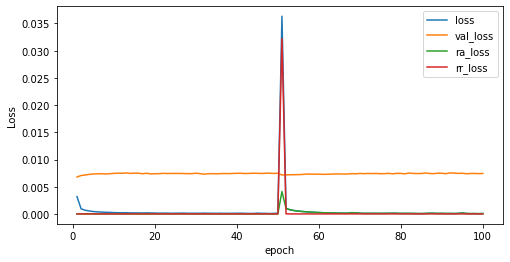

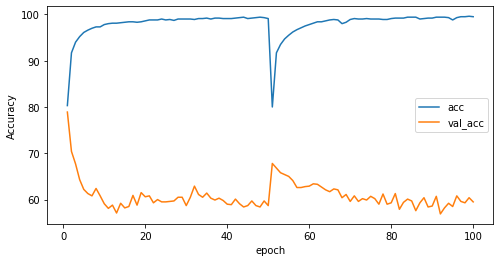

In [12]:
############# Initalize dataset and dataloader
util.seed_all(SEED)
train_dataloader, test_dataloader = decoy_mnist(fmnist=True, device=DEVICE, batch_size=BATCH_SIZE)

#######################################################################
print("CDEP -> Switch XIL on after 50 epochs:")

########### initalize model, loss and optimizer
model = dnns.SimpleConvNet().to(DEVICE)
loss_fn = CDEPLoss(1000)
optimizer = torch.optim.Adam(model.parameters(), lr=LR)

############ Learn routine
learner = Learner(model, loss_fn, optimizer, DEVICE, 'SwitchOnAfter50-DecoyFMnist-CNN-CDEP--reg=1k--seed=10')
learner.fit(train_dataloader, test_dataloader, EPOCHS, save_last=SAVE_LAST, verbose_after_n_epochs=VERBOSE_AFTER_N_EPOCHS, disable_xil_loss_first_n_epochs=DISABLE_FIRST_EPOCHS)

learner.plot_loss_acc()


### HINT: Switch XIL on after 50 epochs

[Using Seed= 10]
Loading dataset from existing file!
HINT -> Switch XIL on after 50 epochs:
Start training...
Epoch 2| accuracy: 91.7%, loss: 0.000941 | Test Error: Acc: 70.4%, Avg loss: 0.007055
Epoch 4| accuracy: 95.2%, loss: 0.000542 | Test Error: Acc: 64.3%, Avg loss: 0.007269
Epoch 6| accuracy: 96.6%, loss: 0.000378 | Test Error: Acc: 61.3%, Avg loss: 0.007370
Epoch 8| accuracy: 97.3%, loss: 0.000299 | Test Error: Acc: 62.4%, Avg loss: 0.007337
Epoch 10| accuracy: 97.8%, loss: 0.000243 | Test Error: Acc: 59.1%, Avg loss: 0.007449
Epoch 12| accuracy: 98.1%, loss: 0.000210 | Test Error: Acc: 58.8%, Avg loss: 0.007461
Epoch 14| accuracy: 98.2%, loss: 0.000192 | Test Error: Acc: 59.2%, Avg loss: 0.007446
Epoch 16| accuracy: 98.4%, loss: 0.000182 | Test Error: Acc: 58.5%, Avg loss: 0.007482
Epoch 18| accuracy: 98.3%, loss: 0.000189 | Test Error: Acc: 58.8%, Avg loss: 0.007471
Epoch 20| accuracy: 98.6%, loss: 0.000160 | Test Error: Acc: 60.6%, Avg loss: 0.007393
Epoch 22| accuracy: 98.8

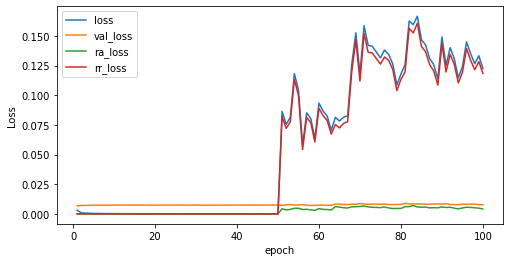

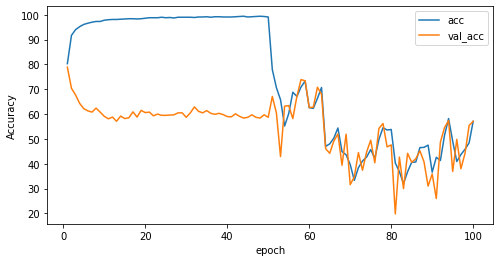

In [13]:
############# Initalize dataset and dataloader
util.seed_all(SEED)
train_dataloader, test_dataloader = decoy_mnist(fmnist=True, hint_expl=True, device=DEVICE, batch_size=BATCH_SIZE)

#######################################################################
print("HINT -> Switch XIL on after 50 epochs:")

########### initalize model, loss and optimizer
model = dnns.SimpleConvNet().to(DEVICE)
loss_fn = HINTLoss(100, last_conv_specified=True, upsample=False)
optimizer = torch.optim.Adam(model.parameters(), lr=LR)

############ Learn routine
learner = Learner(model, loss_fn, optimizer, DEVICE, 'SwitchOnAfter50-DecoyFMnist-CNN-HINT--reg=100--seed=10--downsample')
learner.fit(train_dataloader, test_dataloader, EPOCHS, save_last=SAVE_LAST,verbose_after_n_epochs=VERBOSE_AFTER_N_EPOCHS, disable_xil_loss_first_n_epochs=DISABLE_FIRST_EPOCHS)

learner.plot_loss_acc()


### CE: Switch XIL on after 50 epochs 

[Using Seed= 10]
Loading dataset from existing file!
CE -> Switch XIL on after 50 epochs:
Start training...
Epoch 1| accuracy: 80.3%, loss: 0.003177 | Test Error: Acc: 78.9%, Avg loss: 0.006780
Epoch 2| accuracy: 91.7%, loss: 0.000941 | Test Error: Acc: 70.4%, Avg loss: 0.007055
Epoch 3| accuracy: 94.0%, loss: 0.000677 | Test Error: Acc: 67.7%, Avg loss: 0.007149
Epoch 4| accuracy: 95.2%, loss: 0.000542 | Test Error: Acc: 64.3%, Avg loss: 0.007269
Epoch 5| accuracy: 96.1%, loss: 0.000435 | Test Error: Acc: 62.2%, Avg loss: 0.007338
Epoch 6| accuracy: 96.6%, loss: 0.000378 | Test Error: Acc: 61.3%, Avg loss: 0.007370
Epoch 7| accuracy: 97.0%, loss: 0.000336 | Test Error: Acc: 60.8%, Avg loss: 0.007391
Epoch 8| accuracy: 97.3%, loss: 0.000299 | Test Error: Acc: 62.4%, Avg loss: 0.007337
Epoch 9| accuracy: 97.3%, loss: 0.000285 | Test Error: Acc: 60.8%, Avg loss: 0.007390
Epoch 10| accuracy: 97.8%, loss: 0.000243 | Test Error: Acc: 59.1%, Avg loss: 0.007449
Epoch 11| accuracy: 98.0%, loss

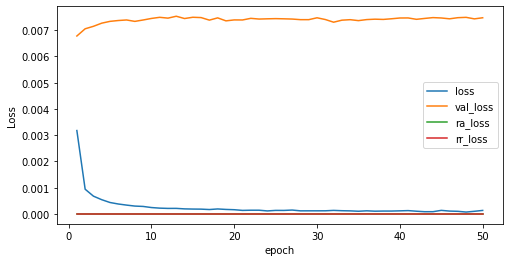

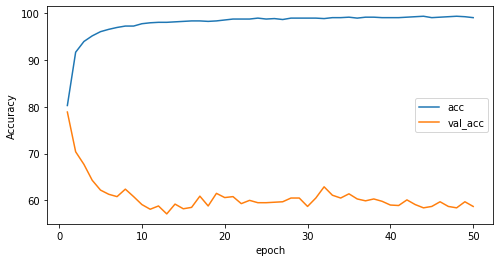

Loading dataset from existing file!
Train set was augmented: X.size= 120000, y.size= 120000
Start training...
Epoch 1| accuracy: 92.2%, loss: 0.001030 | Test Error: Acc: 85.4%, Avg loss: 0.006505
Epoch 2| accuracy: 93.2%, loss: 0.000721 | Test Error: Acc: 85.6%, Avg loss: 0.006467
Epoch 3| accuracy: 95.0%, loss: 0.000513 | Test Error: Acc: 85.7%, Avg loss: 0.006472
Epoch 4| accuracy: 95.8%, loss: 0.000430 | Test Error: Acc: 85.3%, Avg loss: 0.006461
Epoch 5| accuracy: 96.3%, loss: 0.000383 | Test Error: Acc: 86.2%, Avg loss: 0.006423
Epoch 6| accuracy: 96.4%, loss: 0.000372 | Test Error: Acc: 86.4%, Avg loss: 0.006417
Epoch 7| accuracy: 96.6%, loss: 0.000358 | Test Error: Acc: 86.3%, Avg loss: 0.006406
Epoch 8| accuracy: 97.0%, loss: 0.000308 | Test Error: Acc: 87.0%, Avg loss: 0.006373
Epoch 9| accuracy: 97.2%, loss: 0.000290 | Test Error: Acc: 87.1%, Avg loss: 0.006371
Epoch 10| accuracy: 97.4%, loss: 0.000282 | Test Error: Acc: 86.9%, Avg loss: 0.006389
Epoch 11| accuracy: 97.4%, lo

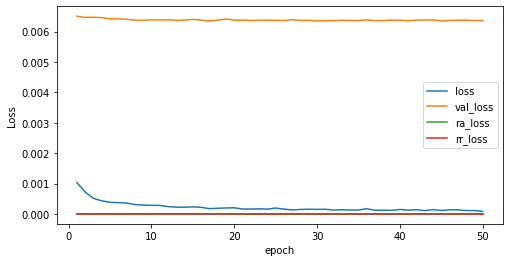

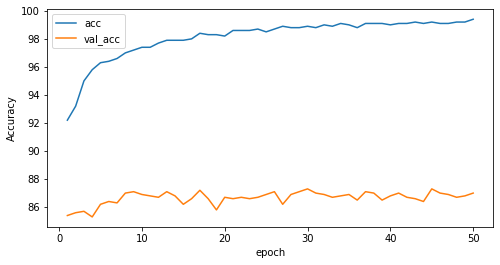

In [14]:
############# Initalize dataset and dataloader
util.seed_all(SEED)
train_dataloader, test_dataloader = decoy_mnist(fmnist=True, device=DEVICE, batch_size=BATCH_SIZE)

#######################################################################
print("CE -> Switch XIL on after 50 epochs:")

# Train for 32 epochs on CEL
########### initalize model, loss and optimizer
model = dnns.SimpleConvNet().to(DEVICE)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=LR)

############ Learn routine
learner = Learner(model, loss_fn, optimizer, DEVICE, 'SwitchOnAfter32-DecoyMnist-CNN-CE--reg=60k--seed=10')
learner.fit(train_dataloader, test_dataloader, DISABLE_FIRST_EPOCHS, save_last=SAVE_LAST)
learner.plot_loss_acc()

# CE augment dataset
train_loader, test_loader = decoy_mnist_CE_augmented(fmnist=True, device=DEVICE, \
                    batch_size=BATCH_SIZE, n_instances=600000, \
                        n_counterexamples_per_instance=1, ce_strategy='random')
learner.fit(train_loader, test_loader, DISABLE_FIRST_EPOCHS, save_last=SAVE_LAST)
learner.plot_loss_acc()
